In [1]:
import pandas as pd

# Specify the URL of the CSV file
url = "https://storm.cis.fordham.edu/~gweiss/classes/cisc5660/data/Malware-staDyn-data.csv"

# Read the CSV into a Pandas DataFrame
try:
    df = pd.read_csv(url)
    print("CSV file imported successfully!")
except Exception as e:
    print(f"An error occurred while importing the CSV: {e}")

print(df.head())  # Display the first few rows
print(df.shape)   # Display the shape (rows, columns) of the DataFrame

CSV file imported successfully!
   Virtual  Offset  loc  Import  Imports  var  Forwarder  UINT  LONG  BOOL  \
0        0       0    1       0        0    0          0     0     0     0   
1        0       0    0       0        0    0          0     0     0     0   
2        0       0    1       0        0    0          0     0     0     0   
3        0       0    1       0        0    0          0     0     0     0   
4        0       0    0       0        0    0          0     0     0     0   

   ...  count_file_written  count_file_exists  count_file_deleted  \
0  ...                   0                  0                   0   
1  ...                   0                  0                   0   
2  ...                   0                  0                   0   
3  ...                   0                  0                   0   
4  ...                   0                  0                   0   

   count_file_copied  count_file_renamed  count_regkey_written  \
0                 

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Separate features (X) and target label (y)
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target label

# 3. Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility

# 5. Train the model on the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from decimal import Decimal

dtc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtc.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

titles = ["Algorithm", "Balance Strategy", "Parameters", "Accuracy", "AUC", "F1-Score", "Precision", "Recall"]

# Create the empty 2D list
data = [[0, 0, 0, 0, 0, 0, 0, 0] for i in range(19)]
data[0] = titles

data[1][0] = "DT"
data[1][1] = "Unbalanced"
data[1][2] = "--"
data[1][3] = accuracy
data[1][4] = auc
data[1][5] = f1
data[1][6] = precision
data[1][7] = recall

# first row
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9928
AUC (Area Under ROC Curve): 0.9868004624102186
F1-Score: 0.9959294436906377
Precision: 0.9972826086956522
Recall: 0.994579945799458


In [4]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn import tree

# Apply ROS
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


y_pred = dtc.predict(X_test)

# Evaluate model performance (same as before)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#plt.figure(figsize=(8, 6))
#tree.plot_tree(dtc,
#               feature_names=df.columns,
#               class_names=[0,1],
#               filled=True,
#               rounded=True)
#               #boxstyle="box"
#              
#plt.title("Decision Tree for Malware Classification")
#plt.show()

data[2][0] = "DT"
data[2][1] = "ROS"
data[2][2] = "--"
data[2][3] = accuracy
data[2][4] = auc
data[2][5] = f1
data[2][6] = precision
data[2][7] = recall

# second row
print("\nEvaluation metrics with ROS applied:")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Evaluation metrics with ROS applied:
Accuracy: 0.9969053934571176
AUC (Area Under ROC Curve): 0.9969405594405594
F1-Score: 0.9969311705392372
Precision: 1.0
Recall: 0.9938811188811189


In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


y_pred = dtc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[3][0] = "DT"
data[3][1] = "SMOTE"
data[3][2] = "--"
data[3][3] = accuracy
data[3][4] = auc
data[3][5] = f1
data[3][6] = precision
data[3][7] = recall

# third row
print("\nEvaluation metrics with SMOTE applied:")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Evaluation metrics with SMOTE applied:
Accuracy: 0.9946949602122016
AUC (Area Under ROC Curve): 0.9947349162465442
F1-Score: 0.9947368421052631
Precision: 0.9982394366197183
Recall: 0.9912587412587412


In [6]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[4][0] = "RF"
data[4][1] = "Unbalanced"
data[4][2] = "10 trees"
data[4][3] = accuracy
data[4][4] = auc
data[4][5] = f1
data[4][6] = precision
data[4][7] = recall

# fourth row
print("Evaluation metrics with Random Forest (10 trees):")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with Random Forest (10 trees):
Accuracy: 0.9976
AUC (Area Under ROC Curve): 0.9895104895104896
F1-Score: 0.9986468200270636
Precision: 0.9972972972972973
Recall: 1.0


In [7]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[5][0] = "RF"
data[5][1] = "SMOTE"
data[5][2] = "5 trees"
data[5][3] = accuracy
data[5][4] = auc
data[5][5] = f1
data[5][6] = precision
data[5][7] = recall

# fifth row
print("Evaluation metrics with Random Forest (5 trees):")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with Random Forest (5 trees):
Accuracy: 0.9960212201591512
AUC (Area Under ROC Curve): 0.996015612294682
F1-Score: 0.9960681520314548
Precision: 0.9956331877729258
Recall: 0.9965034965034965


In [8]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[6][0] = "RF"
data[6][1] = "SMOTE"
data[6][2] = "10 trees"
data[6][3] = accuracy
data[6][4] = auc
data[6][5] = f1
data[6][6] = precision
data[6][7] = recall

# sixth row
print("Evaluation metrics with Random Forest (10 trees):")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with Random Forest (10 trees):
Accuracy: 0.9973474801061007
AUC (Area Under ROC Curve): 0.9973471296145716
F1-Score: 0.9973776223776224
Precision: 0.9973776223776224
Recall: 0.9973776223776224


In [9]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[7][0] = "RF"
data[7][1] = "SMOTE"
data[7][2] = "20 trees"
data[7][3] = accuracy
data[7][4] = auc
data[7][5] = f1
data[7][6] = precision
data[7][7] = recall

# seventh row
print("Evaluation metrics with Random Forest (20 trees):")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with Random Forest (20 trees):
Accuracy: 0.997789566755084
AUC (Area Under ROC Curve): 0.9978045210603351
F1-Score: 0.9978118161925602
Precision: 0.9991235758106923
Recall: 0.9965034965034965


In [10]:
# Random Forest with 10 trees and 5 random features
rf = RandomForestClassifier(n_estimators=10, max_features=5, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[8][0] = "RF"
data[8][1] = "SMOTE"
data[8][2] = "10 trees, 5 features"
data[8][3] = accuracy
data[8][4] = auc
data[8][5] = f1
data[8][6] = precision
data[8][7] = recall

# eighth row
print("Evaluation metrics with Random Forest (10 trees, 5 random features):")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with Random Forest (10 trees, 5 random features):
Accuracy: 0.9942528735632183
AUC (Area Under ROC Curve): 0.9943080175638317
F1-Score: 0.9942907334211682
Precision: 0.999117387466902
Recall: 0.9895104895104895


In [11]:
rf = RandomForestClassifier(n_estimators=10, max_features=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[9][0] = "RF"
data[9][1] = "SMOTE"
data[9][2] = "10 trees, 10 features"
data[9][3] = accuracy
data[9][4] = auc
data[9][5] = f1
data[9][6] = precision
data[9][7] = recall

# ninth row
print("Evaluation metrics with Random Forest (10 trees, 10 random features):")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with Random Forest (10 trees, 10 random features):
Accuracy: 0.9942528735632183
AUC (Area Under ROC Curve): 0.9942775248007806
F1-Score: 0.9943057380639508
Precision: 0.9964881474978051
Recall: 0.9921328671328671


In [12]:
rf = RandomForestClassifier(n_estimators=10, max_features=20, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[10][0] = "RF"
data[10][1] = "SMOTE"
data[10][2] = "10 trees, 20 features"
data[10][3] = accuracy
data[10][4] = auc
data[10][5] = f1
data[10][6] = precision
data[10][7] = recall

# tenth row
print("Evaluation metrics with Random Forest (10 trees, 20 random features):")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with Random Forest (10 trees, 20 random features):
Accuracy: 0.9964633068081344
AUC (Area Under ROC Curve): 0.9964933322491462
F1-Score: 0.9964943032427696
Precision: 0.9991212653778558
Recall: 0.9938811188811189


In [13]:
rf = RandomForestClassifier(n_estimators=10, max_features=40, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[11][0] = "RF"
data[11][1] = "SMOTE"
data[11][2] = "10 trees, 40 features"
data[11][3] = accuracy
data[11][4] = auc
data[11][5] = f1
data[11][6] = precision
data[11][7] = recall

# eleventh row
print("Evaluation metrics with Random Forest (10 trees, 40 random features):")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with Random Forest (10 trees, 40 random features):
Accuracy: 0.9973474801061007
AUC (Area Under ROC Curve): 0.9973471296145716
F1-Score: 0.9973776223776224
Precision: 0.9973776223776224
Recall: 0.9973776223776224


In [14]:
rf = RandomForestClassifier(n_estimators=10, max_features=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[12][0] = "RF"
data[12][1] = "SMOTE"
data[12][2] = "10 trees, 100 features"
data[12][3] = accuracy
data[12][4] = auc
data[12][5] = f1
data[12][6] = precision
data[12][7] = recall

# twelveth row
print("Evaluation metrics with Random Forest (10 trees, 100 random features):")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with Random Forest (10 trees, 100 random features):
Accuracy: 0.9973474801061007
AUC (Area Under ROC Curve): 0.9973674581232721
F1-Score: 0.9973730297723291
Precision: 0.9991228070175439
Recall: 0.9956293706293706


In [15]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a kNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='auto') 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[13][0] = "kNN"
data[13][1] = "Unbalanced"
data[13][2] = "--"
data[13][3] = accuracy
data[13][4] = auc
data[13][5] = f1
data[13][6] = precision
data[13][7] = recall

# thirteenth row
print("Evaluation metrics with kNN:")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with kNN:
Accuracy: 0.9744
AUC (Area Under ROC Curve): 0.9185602112431381
F1-Score: 0.9856244384546272
Precision: 0.9803395889186773
Recall: 0.99096657633243


In [16]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='auto') 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[14][0] = "kNN"
data[14][1] = "SMOTE"
data[14][2] = "k = 5"
data[14][3] = accuracy
data[14][4] = auc
data[14][5] = f1
data[14][6] = precision
data[14][7] = recall

# fouteenth row
print("Evaluation metrics with kNN:")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with kNN:
Accuracy: 0.9827586206896551
AUC (Area Under ROC Curve): 0.9828325744023418
F1-Score: 0.9828420589529256
Precision: 0.9893711248892826
Recall: 0.9763986013986014


In [17]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean', algorithm='auto') 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[15][0] = "kNN"
data[15][1] = "SMOTE"
data[15][2] = "k = 1"
data[15][3] = accuracy
data[15][4] = auc
data[15][5] = f1
data[15][6] = precision
data[15][7] = recall

# fifteenth row
print("Evaluation metrics with kNN:")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with kNN:
Accuracy: 0.9942528735632183
AUC (Area Under ROC Curve): 0.9942673605464303
F1-Score: 0.9943107221006565
Precision: 0.9956178790534619
Recall: 0.993006993006993


In [18]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', algorithm='auto') 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[16][0] = "kNN"
data[16][1] = "SMOTE"
data[16][2] = "k = 3"
data[16][3] = accuracy
data[16][4] = auc
data[16][5] = f1
data[16][6] = precision
data[16][7] = recall

# sixteenth row
print("Evaluation metrics with kNN:")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with kNN:
Accuracy: 0.9907161803713528
AUC (Area Under ROC Curve): 0.990740364286876
F1-Score: 0.9908015768725361
Precision: 0.9929762949956101
Recall: 0.9886363636363636


In [19]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean', algorithm='auto') 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[17][0] = "kNN"
data[17][1] = "SMOTE"
data[17][2] = "k = 10"
data[17][3] = accuracy
data[17][4] = auc
data[17][5] = f1
data[17][6] = precision
data[17][7] = recall

# seventeenth row
print("Evaluation metrics with kNN:")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with kNN:
Accuracy: 0.9721485411140584
AUC (Area Under ROC Curve): 0.9723938851845828
F1-Score: 0.9718624385886556
Precision: 0.993607305936073
Recall: 0.951048951048951


In [20]:
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean', algorithm='auto') 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

data[18][0] = "kNN"
data[18][1] = "SMOTE"
data[18][2] = "k = 20"
data[18][3] = accuracy
data[18][4] = auc
data[18][5] = f1
data[18][6] = precision
data[18][7] = recall

# eigteenth row
print("Evaluation metrics with kNN:")
print("Accuracy:", accuracy)
print("AUC (Area Under ROC Curve):", auc)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Evaluation metrics with kNN:
Accuracy: 0.9615384615384616
AUC (Area Under ROC Curve): 0.961894210440722
F1-Score: 0.9607577807848444
Precision: 0.9925442684063374
Recall: 0.9309440559440559


In [21]:
from tabulate import tabulate
print(tabulate(data))

---------  ----------------  ----------------------  ------------------  ------------------  ------------------  ------------------  ------------------
Algorithm  Balance Strategy  Parameters              Accuracy            AUC                 F1-Score            Precision           Recall
DT         Unbalanced        --                      0.9928              0.9868004624102186  0.9959294436906377  0.9972826086956522  0.994579945799458
DT         ROS               --                      0.9969053934571176  0.9969405594405594  0.9969311705392372  1.0                 0.9938811188811189
DT         SMOTE             --                      0.9946949602122016  0.9947349162465442  0.9947368421052631  0.9982394366197183  0.9912587412587412
RF         Unbalanced        10 trees                0.9976              0.9895104895104896  0.9986468200270636  0.9972972972972973  1.0
RF         SMOTE             5 trees                 0.9960212201591512  0.996015612294682   0.9960681520314548  0.9

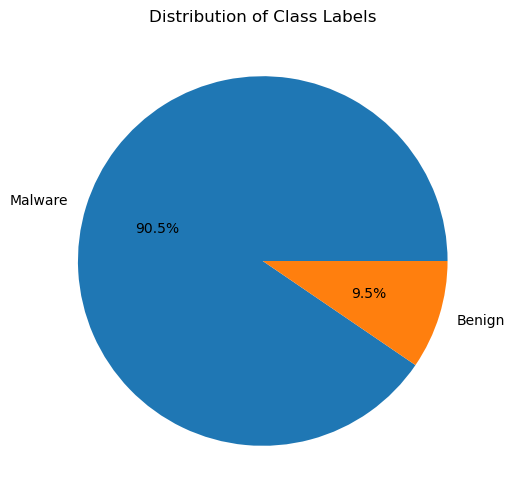

In [22]:
import matplotlib.pyplot as plt

# Replace class labels with descriptive names
df['label_name'] = y.replace({0: 'Benign', 1: 'Malware'})

# Calculate class distribution
class_counts = df['label_name'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Class Labels")
plt.show()

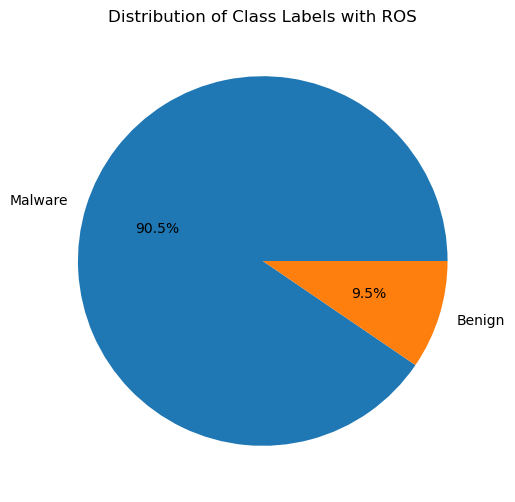

In [24]:
# I don't know why this doesn't work
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df['label_name'] = y_resampled.replace({0: 'Benign', 1: 'Malware'})

class_counts = df['label_name'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Class Labels with ROS")
plt.show()